In [3]:
import os
import glob
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr,spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

# time_points = list(range(0,3000,60)) + [2986]  # every 1 minute
time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
# time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker
# time_points = list(range(0,2987,2)) # every TR


all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))
    
attitude = pd.DataFrame(all_subject_data)

start_attitude = pd.DataFrame(attitude)[0]
start_attitude_SM = -np.abs(start_attitude.values[:, np.newaxis] - start_attitude.values)

attitude_change = attitude.diff(axis=1)
attitude_change = attitude_change.drop(attitude_change.columns[0], axis=1)
print(attitude_change.shape)

attitude_change_distances = -pdist(attitude_change)
# attitude_change_distances = -np.sqrt(pdist(attitude_change))
# attitude_change_distances = -np.log(pdist(attitude_change))
attitude_change_distances_matrix = squareform(attitude_change_distances)
print(attitude_change_distances_matrix.shape)

SM2min = attitude_change_distances_matrix


(37, 25)
(37, 37)


In [9]:
bahav_data_dir = '/Users/li/Desktop/task-debate/behavdata'

sub_list_num = list(range(13,51))
sub_list_num.remove(21)

time_points = list(range(0,3000,60)) + [2986]  # every 1 minute
# time_points = list(range(0,3000,120)) + [2986] # every 2 min
# time_points = list(range(0,3000,300)) + [2986] # every 5 min
# time_points = [0, 252, 500, 772, 1098, 1484, 1892, 2464, 2986] # every speaker
# time_points = list(range(0,2987,2)) # every TR


all_subject_data = []
for sub in sub_list_num:
    file_path = os.path.join(bahav_data_dir, 'during_scan', 'combined_6runs_per_TR_filter', f'subject_{sub}_TR_rate.csv')
    
    df = pd.read_csv(file_path)
    sub_data = df[df['time'].isin(time_points)]
    all_subject_data.append(list(sub_data['rate']))
    
attitude = pd.DataFrame(all_subject_data)

start_attitude = pd.DataFrame(attitude)[0]
start_attitude_SM = -np.abs(start_attitude.values[:, np.newaxis] - start_attitude.values)

attitude_change = attitude.diff(axis=1)
attitude_change = attitude_change.drop(attitude_change.columns[0], axis=1)
print(attitude_change.shape)

attitude_change_distances = -pdist(attitude_change)
# attitude_change_distances = -np.sqrt(pdist(attitude_change))
# attitude_change_distances = -np.log(pdist(attitude_change))
attitude_change_distances_matrix = squareform(attitude_change_distances)
print(attitude_change_distances_matrix.shape)

SM1min = attitude_change_distances_matrix


(37, 50)
(37, 37)


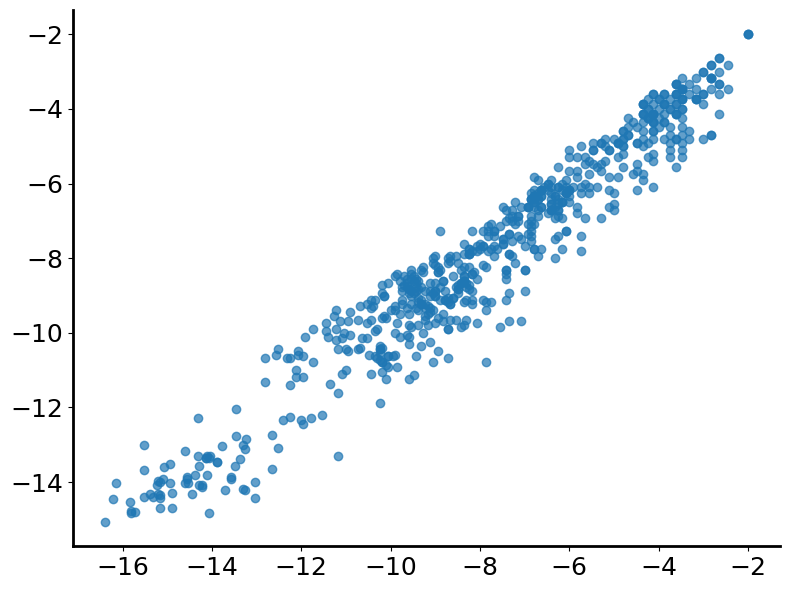

In [17]:

triu_indices = np.triu_indices_from(SM2min, k=1)
A_triu = SM2min[triu_indices]
B_triu = SM1min[triu_indices]

# 计算相关性
corr, p_value = pearsonr(A_triu, B_triu)

# 画散点图
plt.figure(figsize=(8, 6))
plt.scatter(A_triu, B_triu, alpha=0.7)
# plt.xlabel("Matrix A (Upper Triangle)")
# plt.ylabel("Matrix B (Upper Triangle)")
# plt.title(f"Different intesegment Corrletion of : r={corr:.3f}, p={p_value:.3f}")
plt.grid(False)

plt.gca().spines['top'].set_visible(False)  # 去掉上框线
plt.gca().spines['right'].set_visible(False)  # 去掉右框线
plt.gca().spines['left'].set_linewidth(2)  # 设置左框线宽度
plt.gca().spines['bottom'].set_linewidth(2)  # 设置下框线宽度
# plt.gca().grid(False)  # 关闭网格线

# 调整布局，避免标签重叠
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().tick_params(axis='both', labelsize=18) 

# 调整布局，避免标签重叠
plt.tight_layout()
# 保存图像
plt.savefig('/Users/li/Desktop/Figure/3c.png', dpi=300)
# 显示图像
plt.show()

